In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
train_df = pd.read_csv("train_mercedes.csv")
test_df = pd.read_csv("test_mercedes.csv")

# Exploratory Data Analysis

In [3]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape, test_df.shape

((4209, 378), (4209, 377))

In [6]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Checking for the column names
train_df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [8]:
train_df.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [9]:
test_df.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [59]:
# Separating numerical and categorical columns

numerical_features = train_df.select_dtypes(include=[np.number]).columns
categorical_features = train_df.select_dtypes(include= [np.object]).columns

print("Size of Numerical Features: {}".format(len(numerical_features)))
print("Size of Categorical Features: {}".format(len(categorical_features)))

Size of Numerical Features: 366
Size of Categorical Features: 0


In [11]:
numerics = ['int16','int32','int64','float16','float32','float64']
objects = ['object']

In [12]:
train_df_numerical = train_df.select_dtypes(include=numerics)
train_df_categorical = train_df.select_dtypes(include=objects)

print(train_df_numerical.shape, train_df_categorical.shape)

(4209, 370) (4209, 8)


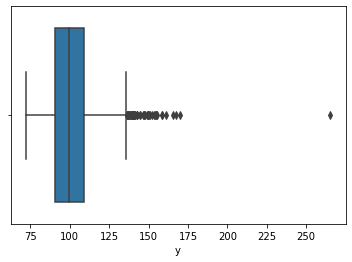

In [13]:
# Outlier Detection

plt.figure()
sns.boxplot(train_df['y']);

In [14]:
from numpy import percentile

In [15]:
# calculating inter-quartile range

q25,q75 = percentile(train_df.loc[:,'y'], 25), percentile(train_df.loc[:,'y'], 75)


In [16]:
iqr = q75 - q25

In [17]:
print(q25,q75,iqr)

90.82 109.01 18.190000000000012


In [18]:
# calculating outlier cut-off

cut_off = iqr*1.5
lower,upper = q25-cut_off, q75+cut_off

print(lower,upper)

63.534999999999975 136.29500000000002


In [19]:
# identifying outliers

outliers = [x for x in train_df.loc[:,'y'] if x < lower or x > upper]

In [20]:
outliers

[139.2,
 136.41,
 146.83,
 150.43,
 169.91,
 136.47,
 154.87,
 147.72,
 140.49,
 265.32,
 158.53,
 141.31,
 140.15,
 137.44,
 140.41,
 144.36,
 154.43,
 149.63,
 160.87,
 150.89,
 152.32,
 139.08,
 142.71,
 167.45,
 139.61,
 154.16,
 136.96,
 140.25,
 142.71,
 148.94,
 136.56,
 137.49,
 137.09,
 158.23,
 153.51,
 141.39,
 144.56,
 138.19,
 147.22,
 139.16,
 140.31,
 146.3,
 165.52,
 137.32,
 141.09,
 139.07,
 155.62,
 136.75,
 142.46,
 149.52]

In [21]:
removed_outlier = [x for x in train_df.loc[:,'y'] if x >= lower or x <= upper]

In [22]:
removed_outlier

[130.81,
 88.53,
 76.26,
 80.62,
 78.02,
 92.93,
 128.76,
 91.91,
 108.67,
 126.99,
 102.09,
 98.12,
 82.62,
 94.12,
 99.15,
 93.64,
 106.1,
 114.13,
 89.81,
 90.81,
 90.56,
 94.57,
 108.14,
 120.77,
 84.84,
 93.59,
 104.07,
 89.37,
 90.08,
 128.19,
 76.01,
 107.86,
 106.87,
 104.85,
 114.78,
 91.56,
 98.16,
 117.31,
 79.0,
 110.76,
 101.44,
 91.98,
 98.08,
 139.2,
 85.44,
 110.52,
 91.44,
 91.52,
 91.59,
 108.0,
 116.59,
 93.81,
 119.44,
 91.57,
 97.24,
 90.11,
 94.83,
 108.42,
 95.57,
 88.82,
 104.78,
 87.75,
 93.27,
 111.74,
 109.76,
 84.15,
 93.67,
 107.72,
 90.87,
 118.24,
 89.91,
 113.4,
 118.53,
 79.03,
 92.47,
 100.98,
 114.76,
 111.15,
 108.57,
 93.03,
 93.12,
 113.31,
 94.27,
 102.31,
 101.59,
 110.37,
 98.84,
 101.98,
 96.96,
 90.8,
 110.98,
 73.7,
 111.42,
 98.91,
 106.46,
 115.43,
 91.94,
 108.37,
 127.66,
 93.62,
 106.67,
 96.06,
 92.5,
 92.35,
 102.97,
 109.43,
 106.31,
 87.15,
 107.83,
 112.75,
 89.49,
 126.17,
 100.38,
 95.42,
 112.39,
 92.7,
 88.78,
 105.15,
 118.74,


In [23]:
df = train_df.append(test_df, ignore_index= True)

In [24]:
df = pd.get_dummies(df)

In [25]:
train, test = df.iloc[0:len(train_df)], df.iloc[len(train_df):]

In [26]:
train.shape, test.shape

((4209, 581), (4209, 581))

In [27]:
feature = train.drop(['ID', 'y'], axis = 1)
target = train['y']

feature_test = test.drop(['ID','y'], axis = 1)

In [28]:
X_train,X_test, y_train,y_test = train_test_split(feature,target,random_state=1)

# Q.1 If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [29]:
# Checking whether we have column with var = 0 or not in train set
train_df.var() == 0

ID      False
y       False
X10     False
X11      True
X12     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 370, dtype: bool

In [30]:
# Checking whether we have column with var = 0 or not in test set
test_df.var() == 0

ID      False
X10     False
X11     False
X12     False
X13     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 369, dtype: bool

In [31]:
train_columns = []
for i in train_df.columns:
    if(train_df[i].dtypes == np.int64 or train_df[i].dtypes == np.float64):
        train_columns.append(i)

len(train_columns)

370

In [32]:
for i in train_columns:
    if(train_df[i].var() == 0):
        train_df.drop(i,axis=1, inplace=True)
        
train.shape

(4209, 581)

In [33]:
train_df.shape

(4209, 366)

In [34]:
test_columns = []
for i in test_df.columns:
    if(test_df[i].dtypes == np.int64 or test_df[i].dtypes == np.float64):
        test_columns.append(i)

len(test_columns)

369

In [35]:
for i in test_columns:
    if(test_df[i].var() == 0):
        test_df.drop(i,axis=1, inplace=True)
        
test.shape

(4209, 581)

### Conclusion: 1 column having variance equals to 0 is removed

# Q.2 Check for null and unique values for test and train sets.

In [36]:
# Checking for null values for train sets

train_df.isna().any().any()

False

In [37]:
# Checking for null values for test sets

test_df.isna().any().any()

False

#### Conclusion: There is no nullvalues in train and test sets

In [38]:
# Checking for unique values in train sets

for i in train_df.columns:
    print(f"Unique value in {i} : ",train_df[i].unique())

Unique value in ID :  [   0    6    7 ... 8412 8415 8417]
Unique value in y :  [130.81  88.53  76.26 ...  85.71 108.77  87.48]
Unique value in X0 :  ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Unique value in X1 :  ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Unique value in X2 :  ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
Unique value in X3 :  ['a' 'e' 'c' 'f' 'd' 'b' 'g']
Unique value in X4 :  ['d' 'b' 'c' 'a']
Unique value in X5 :  ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Unique value in X6 :  ['j' 'l' 'd' 'h'

In [39]:
# Checking for unique values in test sets

for i in test_df.columns:
    print(f"Unique value in {i} : ",test_df[i].unique())

Unique value in ID :  [   1    2    3 ... 8413 8414 8416]
Unique value in X0 :  ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
Unique value in X1 :  ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
Unique value in X2 :  ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
Unique value in X3 :  ['f' 'a' 'c' 'e' 'd' 'g' 'b']
Unique value in X4 :  ['d' 'b' 'a' 'c']
Unique value in X5 :  ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Unique value in X6 :  ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
Unique

# Q.3 Apply label encoder.

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()

In [42]:
# Applying Label Encoder on train dataset
for i in train_df.columns:
    train_df[i] = encoder.fit_transform(train_df[i])

In [43]:
# Applying Label Encoder on test dataset
for i in test_df.columns:
    test_df[i] = encoder.fit_transform(test_df[i])

In [44]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,2466,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,1,366,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,2,69,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,3,133,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,106,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,1,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,2,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,3,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,4,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


# Q.4 Perform dimensionality reduction.

# Performing PCA

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=1)
pca.fit_transform(train_df)

array([[ 2159.31236803],
       [ 2062.74727948],
       [ 2048.23940522],
       ...,
       [-2072.4387308 ],
       [-2142.64394323],
       [-2068.97983502]])

In [48]:
pca.components_

array([[-9.98954396e-01,  4.55000828e-02,  7.68775155e-05,
        -5.96618214e-04,  2.24636189e-04,  4.13576429e-05,
        -1.17345961e-06, -4.40711150e-03,  4.25458728e-05,
        -3.77528722e-05, -2.30849383e-07, -1.22594463e-05,
         6.36237272e-06,  1.27550360e-05, -3.10636378e-08,
         1.57610470e-06,  2.45708751e-06,  1.97015036e-06,
         1.78237199e-06, -1.90557760e-05,  1.29313806e-06,
         2.16611487e-05,  9.53342206e-07,  3.25101040e-07,
         2.78774944e-06, -2.03823945e-06, -5.33759223e-06,
        -2.14071127e-06, -9.13776760e-07,  1.30426838e-05,
        -1.12230665e-06, -2.01433816e-07,  5.98939146e-07,
         1.30426838e-05, -6.67115370e-07,  1.30426838e-05,
        -3.76196771e-05, -2.01433816e-07, -4.06810081e-07,
         1.18641361e-06,  2.85789289e-07, -5.38976715e-06,
         6.69828528e-06,  9.99932636e-06, -6.49440435e-06,
         3.53034843e-06, -1.39229130e-06,  1.39821064e-06,
        -1.32984040e-05, -1.03861755e-05, -2.87818643e-0

In [49]:
pca.explained_variance_ratio_

array([0.75485702])

# Q.5 Predict your test_df values using XGBoost.

In [50]:
from xgboost import XGBRegressor

In [51]:
xgb = XGBRegressor()

In [52]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
my_pred = xgb.predict(X_test)

In [54]:
print(my_pred)

[ 75.84715  112.27537  107.41806  ... 111.53942   94.190704 111.197044]


In [55]:
from sklearn.metrics import  r2_score,mean_squared_error

In [56]:
r2_score(y_test,my_pred)

0.49084534599196084

In [57]:
mean_squared_error(y_test,my_pred)

78.6772698449673

In [58]:
cross_val_score(xgb, feature, target, cv=2).mean()*100

51.10685506549692

# Prediction on the test data

In [61]:
test_pred = xgb.predict(feature_test)
print(test_pred)

[ 90.83274  105.69338   90.18588  ...  92.33703  108.685684  92.22    ]
